In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.svm import LinearSVC




In [19]:
df = pd.read_csv("D:\ML\_______PROJECT________\online paymetn fraud detection\data\online_fraud_dataset.csv")

In [20]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [21]:
df.shape

(6362620, 11)

In [22]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)


In [24]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [26]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# **Univariate analysis**


<Axes: xlabel='step', ylabel='Count'>

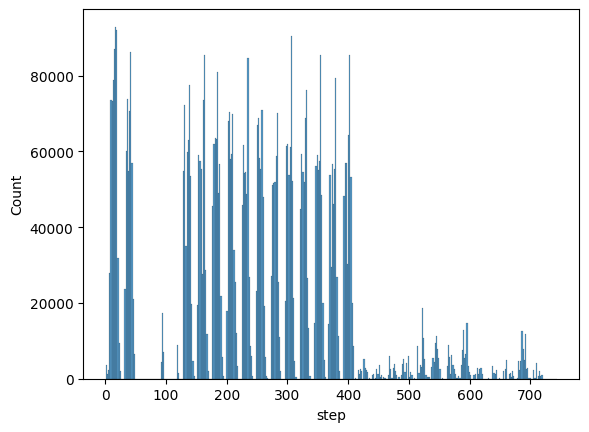

In [27]:
#Step 
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

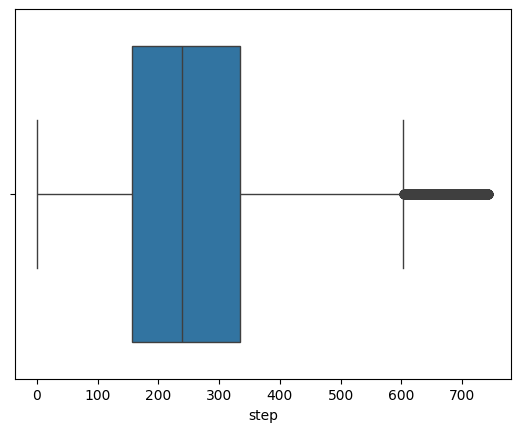

In [28]:
sns.boxplot(data=df,x='step')


<Axes: xlabel='type', ylabel='count'>

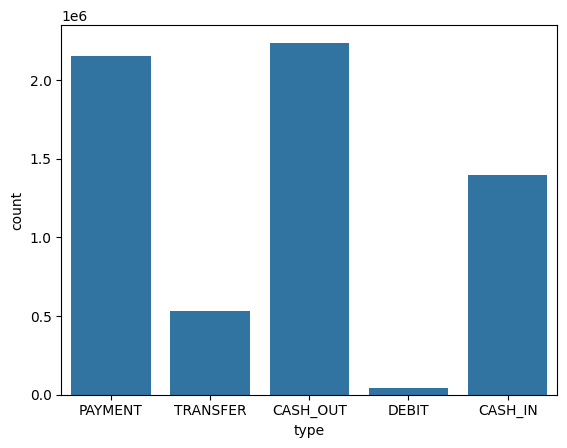

In [29]:
#type
sns.countplot(data=df,x='type')


<Axes: xlabel='amount', ylabel='Count'>

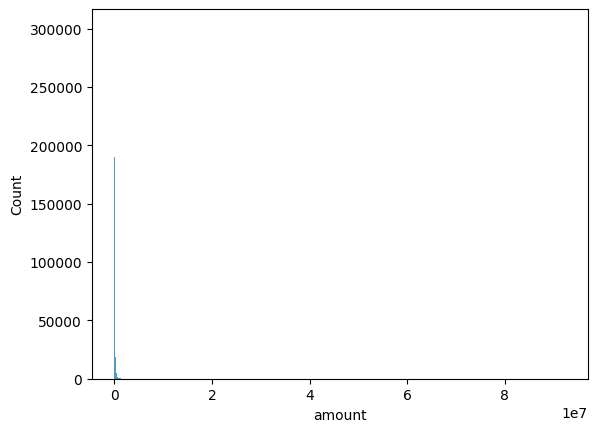

In [30]:
sns.histplot(data=df,x='amount')


<Axes: xlabel='amount'>

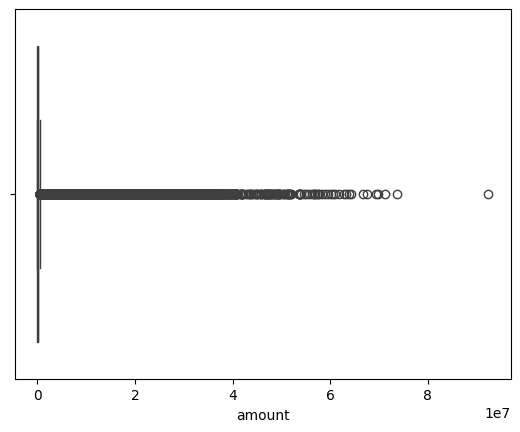

In [31]:
sns.boxplot(data=df,x='amount')


<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

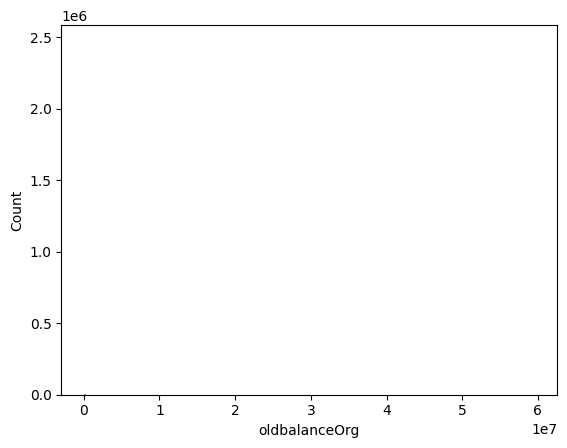

In [32]:
sns.histplot(data=df,x='oldbalanceOrg')


In [33]:
df['nameDest'].value_counts()


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

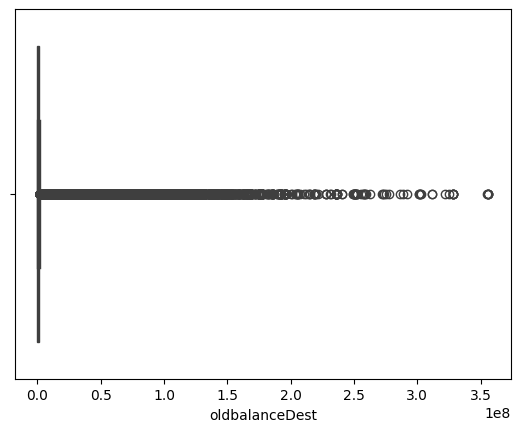

In [34]:
sns.boxplot(data=df,x='oldbalanceDest')


<Axes: xlabel='newbalanceDest'>

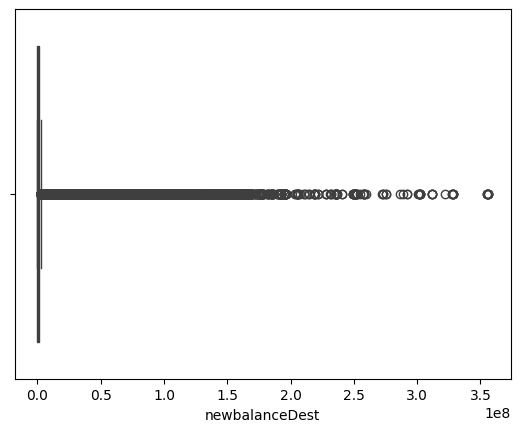

In [35]:
sns.boxplot(data=df,x='newbalanceDest')


<Axes: xlabel='isFraud', ylabel='count'>

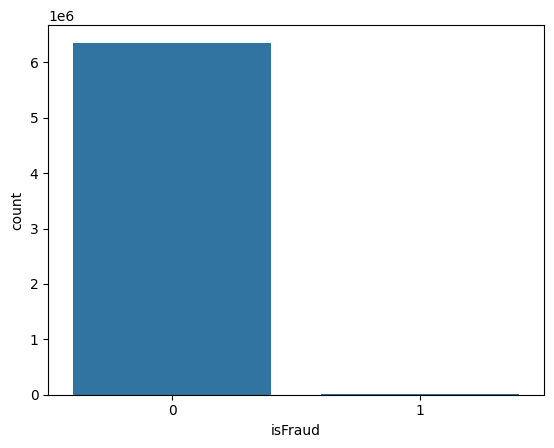

In [36]:
sns.countplot(data=df,x='isFraud')


In [37]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [40]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud' 
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


# **Bivariate analysis**


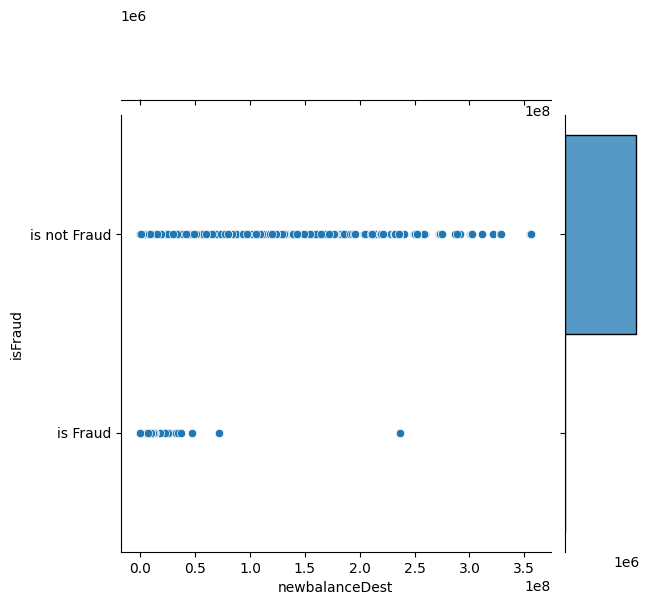

In [41]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')


<Axes: xlabel='type', ylabel='count'>

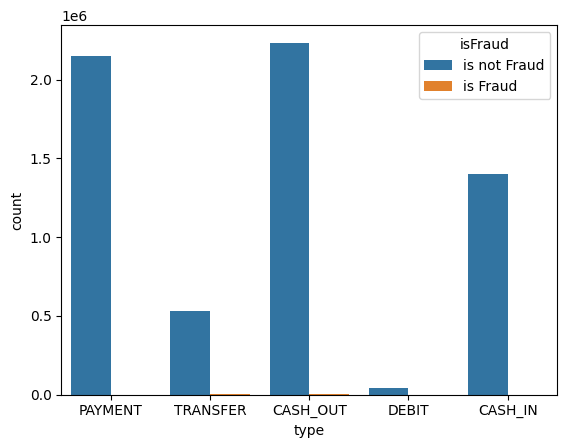

In [42]:
sns.countplot(data=df,x='type',hue='isFraud')


<Axes: xlabel='isFraud', ylabel='step'>

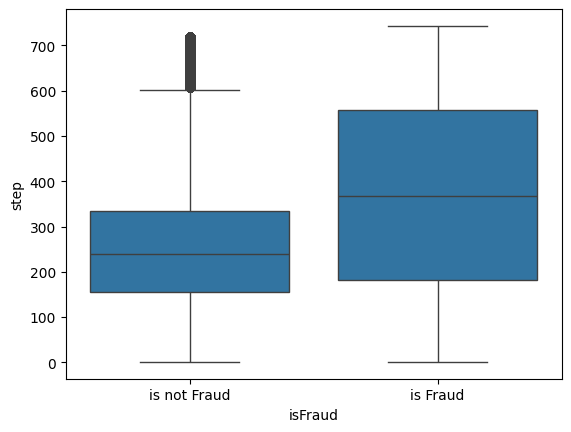

In [43]:
sns.boxplot(data=df,x='isFraud',y='step')


<Axes: xlabel='isFraud', ylabel='amount'>

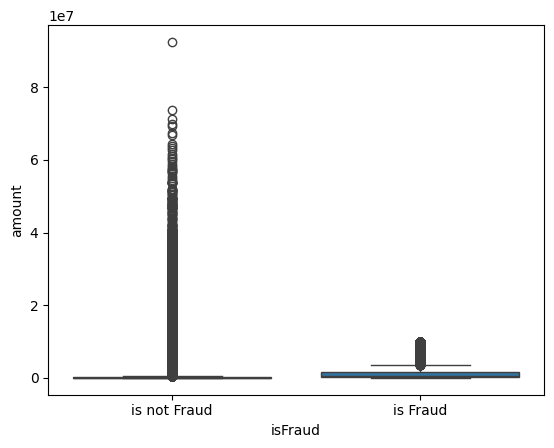

In [44]:
sns.boxplot(data=df,x='isFraud',y='amount')


<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

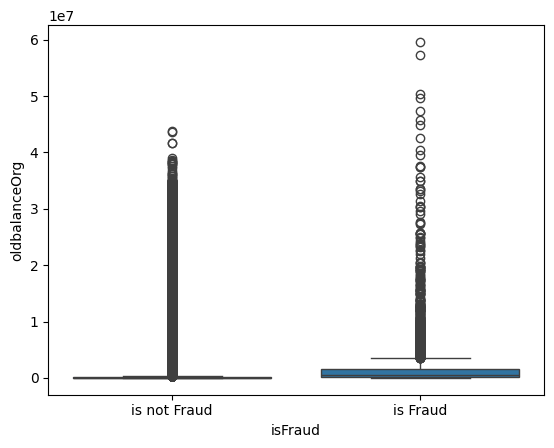

In [45]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')


<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

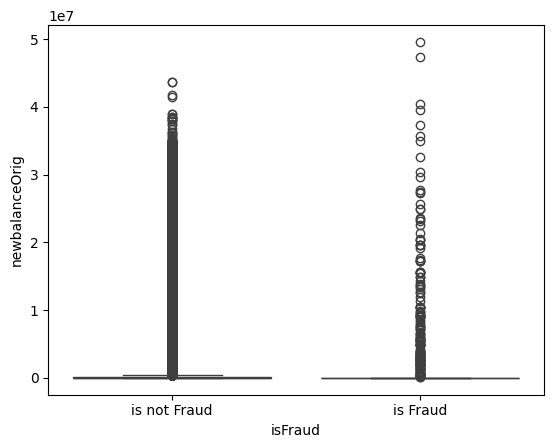

In [48]:
sns.boxplot(data=df, x='isFraud', y='newbalanceOrig')


<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

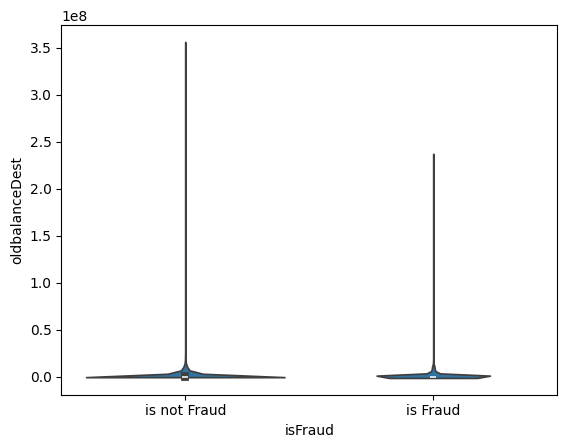

In [49]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')


<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

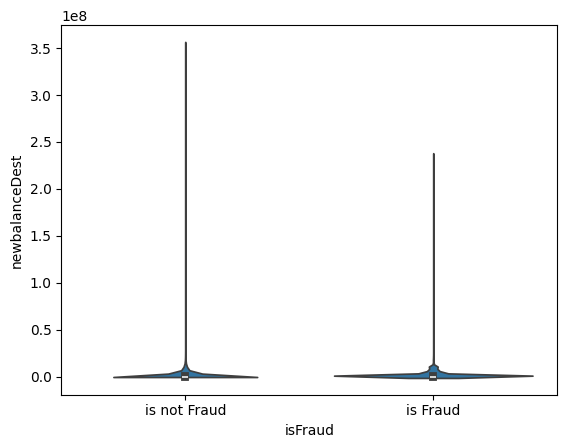

In [50]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')


# **Descriptive analysis**

In [47]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN
